<center> <h3> Black Friday Analysis </h3></center>
<center>Sita Robinson, Jonathan Law, Dariia Kovpak</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("BlackFriday.csv")

There are 537,577 rows and 12 columns in this dataset

In [3]:
df.shape

(537577, 12)

Looking at the column names in this dataset

In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<center>The data columns are described as:</center>

| Variable | Definition  |
|------|------|
|   User_ID | User ID|
|Product_ID |Product ID|
|Gender|Sex of User|
|Age|	Age in bins|
|Occupation|	Occupation (Masked)|
|City_Category|	Category of the City (A,B,C)|
|Stay_In_Current_City_Years|	Number of years stay in current city|
|Marital_Status|	Marital Status|
|Product_Category_1|	Product Category (Masked)|
|Product_Category_2|	Product may belongs to other category also (Masked)|
|Product_Category_3|	Product may belongs to other category also (Masked)|
|Purchase|	Purchase Amount (Target Variable)|

Looking at the first 5 rows

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Data types of each column.

In [6]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Checking the nulls in the data.  There seems to be only nulls in the columns Product_Category_2 and Product_Category_3.

In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

There are no duplicates in the data.

In [8]:
df.duplicated().sum()

0

Checking number of unique values in each column

In [9]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

Unique values in Stay_In_Current_City_Years column.

In [10]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

Unique values in Age column.

In [11]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

Summary statistics on Purchase column.

In [12]:
df['Purchase'].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

**Number of Purchases made by Person**

In [13]:
users=pd.DataFrame(df.groupby('User_ID').size())
users.sort_values(by=[0], ascending=False)

,0
User_ID,
1001680,1025
1004277,978
1001941,898
1001181,861
1000889,822
1003618,766
1001150,752
1001015,739
1002909,717


<hr>

**Number of Men vs Women who Purchased on Black Friday**

In [16]:
gender=df.groupby('User_ID').agg({'Gender':'first'})['Gender'].value_counts()

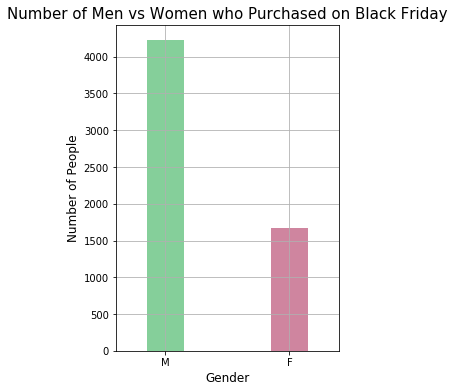

In [17]:
%matplotlib inline
gender.plot(kind='bar', figsize=(4,6), width=0.3, color=[('#85cf9a', '#cf859f')], legend=False)
plt.title("Number of Men vs Women who Purchased on Black Friday", fontsize="15")
plt.xlabel("Gender", fontsize="12")
plt.ylabel("Number of People", fontsize="12")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

**Number of Purchases Made by Males and Females on Black Friday**

In [18]:
gender=df['Gender'].value_counts()
gender

M    405380
F    132197
Name: Gender, dtype: int64

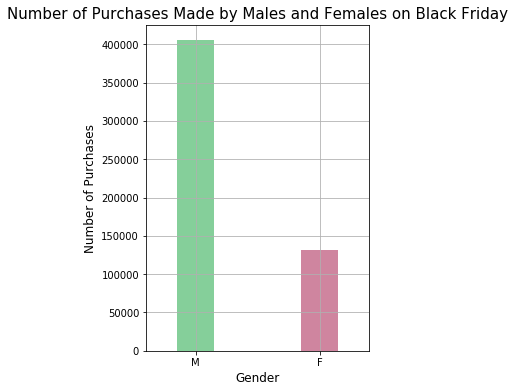

In [19]:
gender.plot(kind='bar', figsize=(4,6), width=0.3, color=[('#85cf9a', '#cf859f')], legend=False)
plt.title("Number of Purchases Made by Males and Females on Black Friday", fontsize="15")
plt.xlabel("Gender", fontsize="12")
plt.ylabel("Number of Purchases", fontsize="12")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

**Total Sales by Men and Women**

In [20]:
totalsalesbygender=df.groupby('Gender').agg({'Purchase':np.sum}).sort_values('Purchase', ascending=False)
totalsalesbygender

,Purchase
Gender,
M,3853044357
F,1164624021


Total purchased sales

In [21]:
sum(df.Purchase)

5017668378

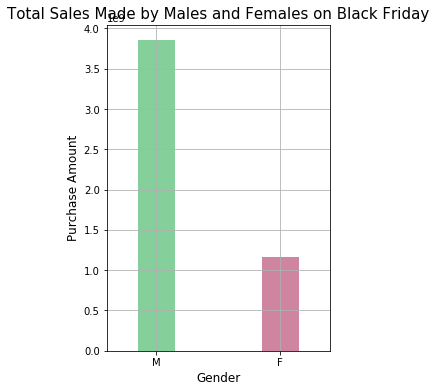

In [22]:
totalsalesbygender.plot(kind='bar', figsize=(4,6), width=0.3, color=[('#85cf9a', '#cf859f')], legend=False)
plt.title("Total Sales Made by Males and Females on Black Friday", fontsize="15")
plt.xlabel("Gender", fontsize="12")
plt.ylabel("Purchase Amount", fontsize="12")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

**Average Black Friday Purchase by Gender**

In [25]:
avgpurchasegender=df.groupby('Gender').agg({'Purchase':np.average}).sort_values('Purchase', ascending=False)
avgpurchasegender

,Purchase
Gender,
M,9504.771713
F,8809.761349


Average Overall Purchase

In [23]:
np.average(df.Purchase)

9333.859852635065

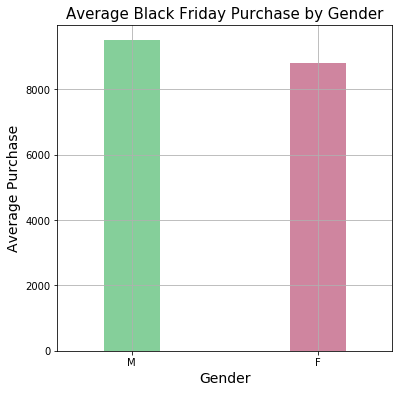

In [26]:
avgpurchasegender.plot(kind='bar', figsize=(6,6), width=0.3, color=[('#85cf9a', '#cf859f','#cf9d85')], legend=False)
plt.title("Average Black Friday Purchase by Gender", fontsize="15")
plt.xlabel("Gender", fontsize="14")
plt.ylabel("Average Purchase", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

<hr>

The age bucket 25-35 seem to have the most purchases on Black Friday while the age bucket from 0-17 purchased the least. 

In [27]:
age=df['Age'].value_counts()
age

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

<hr>

**Number of Purchases Made by Occupation on Black Friday**

Occupation 4 seems to have the most purchases on Black Friday while occupation 8 has the least. 

In [28]:
occupation=df['Occupation'].value_counts()
occupation

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

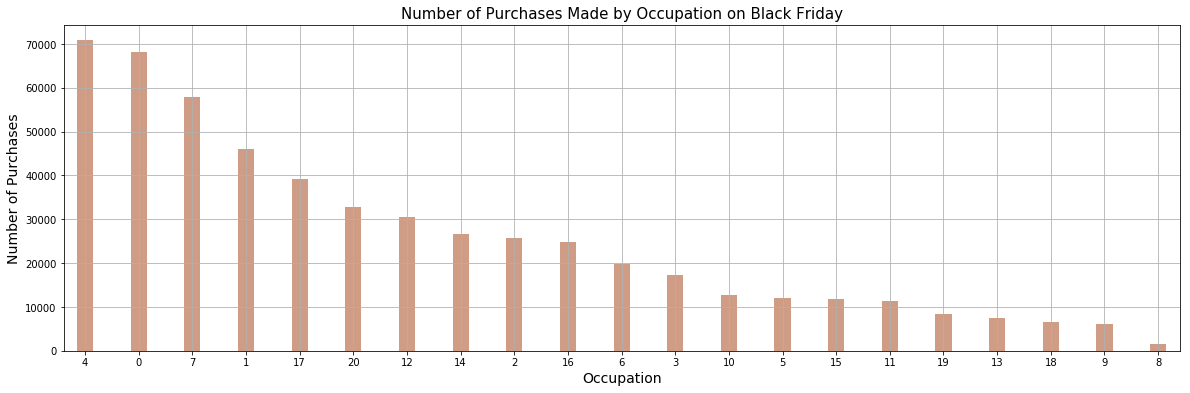

In [29]:
occupation.plot(kind='bar', figsize=(20,6), width=0.3, color=['#cf9d85'], legend=False)
plt.title("Number of Purchases Made by Occupation on Black Friday", fontsize="15")
plt.xlabel("Occupation", fontsize="14")
plt.ylabel("Number of Purchases", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

**Total Sales by Occupation**

In [30]:
totalsalesbyoccupation=df.groupby('Occupation').agg({'Purchase':np.sum}).sort_values('Purchase', ascending=False)
totalsalesbyoccupation

,Purchase
Occupation,
4,657530393
0,625814811
7,549282744
1,414552829
17,387240355
12,300672105
20,292276985
14,255594745
16,234442330


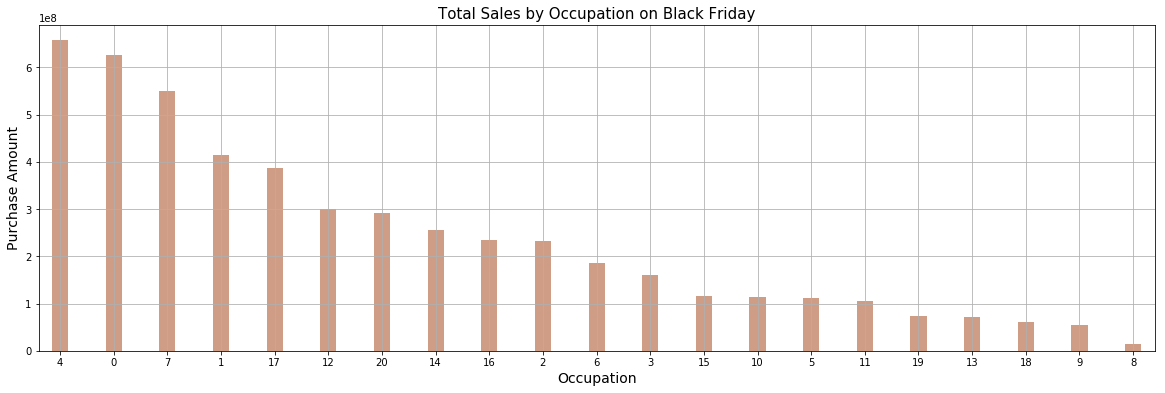

In [31]:
totalsalesbyoccupation.plot(kind='bar', figsize=(20,6), width=0.3, color=['#cf9d85'], legend=False)
plt.title("Total Sales by Occupation on Black Friday", fontsize="15")
plt.xlabel("Occupation", fontsize="14")
plt.ylabel("Purchase Amount", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

**Average Purchase by Occupation**

In [32]:
avgpurchaseoccupation=df.groupby('Occupation').agg({'Purchase':np.average}).sort_values('Purchase', ascending=False)
avgpurchaseoccupation

,Purchase
Occupation,
17,9906.378997
12,9883.052460
15,9866.239925
8,9576.508530
14,9568.536426
7,9502.175276
16,9457.133118
13,9424.449391
5,9388.848978


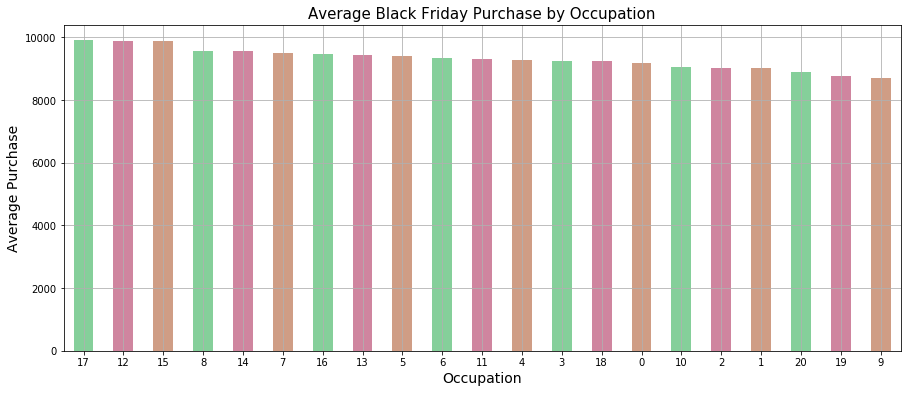

In [33]:
avgpurchaseoccupation.plot(kind='bar', figsize=(15,6), width=0.5, color=[('#85cf9a', '#cf859f','#cf9d85')], legend=False)
plt.title("Average Black Friday Purchase by Occupation", fontsize="15")
plt.xlabel("Occupation", fontsize="14")
plt.ylabel("Average Purchase", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

<hr>

**Number of Purchases Made by City Category on Black Friday**

There are three city categories.  City B had the most number of purchases on Black Friday followed by City C and City A.  

In [38]:
city=df['City_Category'].value_counts()
city

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

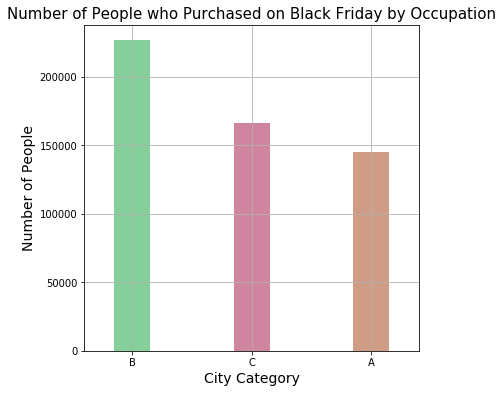

In [39]:
city.plot(kind='bar', figsize=(6,6), width=0.3, color=[('#85cf9a', '#cf859f','#cf9d85')], legend=False)
plt.title("Number of People who Purchased on Black Friday by Occupation", fontsize="15")
plt.xlabel("City Category", fontsize="14")
plt.ylabel("Number of People", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

**Total Sales by City Category**

In [40]:
totalsalesbycitycat=df.groupby('City_Category').agg({'Purchase':np.sum}).sort_values('Purchase', ascending=False)
totalsalesbycitycat

,Purchase
City_Category,
B,2083431612
C,1638567969
A,1295668797


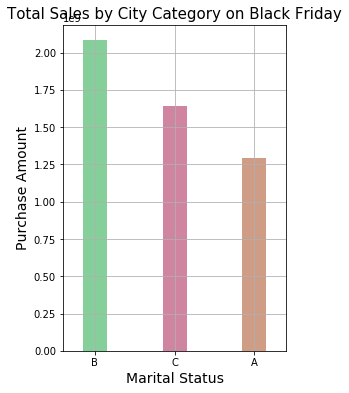

In [41]:
totalsalesbycitycat.plot(kind='bar', figsize=(4,6), width=0.3, color=[('#85cf9a', '#cf859f', '#cf9d85')], legend=False)
plt.title("Total Sales by City Category on Black Friday", fontsize="15")
plt.xlabel("Marital Status", fontsize="14")
plt.ylabel("Purchase Amount", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

**Average Purchase by City Category**

City C on average spent the most on Black Friday followed by City B.  City A had the lowest average purchase amongst the city categories.

In [42]:
avgpurchasecitycat=df.groupby('City_Category').agg({'Purchase':np.average}).sort_values('Purchase', ascending=False)
avgpurchasecitycat

,Purchase
City_Category,
C,9844.441855
B,9198.657848
A,8958.011014


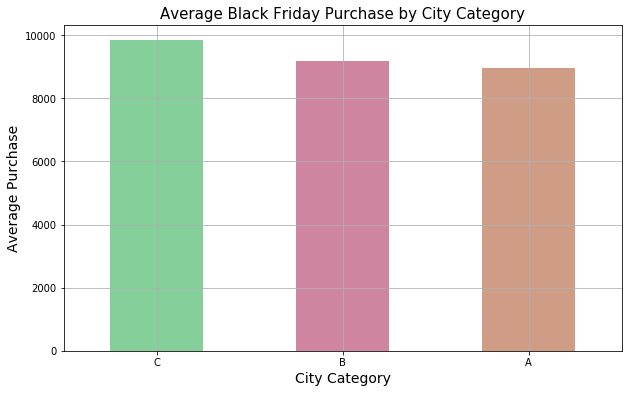

In [44]:
avgpurchasecitycat.plot(kind='bar', figsize=(10,6), width=0.5, color=[('#85cf9a', '#cf859f','#cf9d85')], legend=False)
plt.title("Average Black Friday Purchase by City Category", fontsize="15")
plt.xlabel("City Category", fontsize="14")
plt.ylabel("Average Purchase", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

<hr>

**Number of Purchases Made on Black Friday by Number of Years Stay in Current City**

In [45]:
stay=df['Stay_In_Current_City_Years'].value_counts()
stay

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

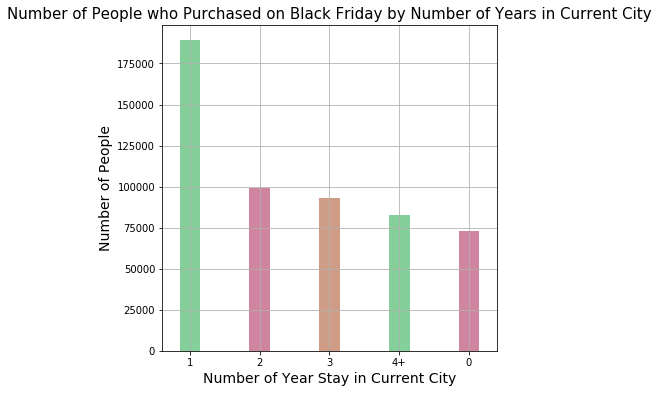

In [46]:
stay.plot(kind='bar', figsize=(6,6), width=0.3, color=[('#85cf9a', '#cf859f','#cf9d85')], legend=False)
plt.title("Number of People who Purchased on Black Friday by Number of Years in Current City", fontsize="15")
plt.xlabel("Number of Year Stay in Current City", fontsize="14")
plt.ylabel("Number of People", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

**Total Sales Made on Black Friday by Number of Years Stay in Current City**

In [47]:
totalsalesbycitystay=df.groupby('Stay_In_Current_City_Years').agg({'Purchase':np.sum}).sort_values('Purchase', ascending=False)
totalsalesbycitystay

,Purchase
Stay_In_Current_City_Years,
1,1763243917
2,934676626
3,872531130
4+,774711276
0,672505429


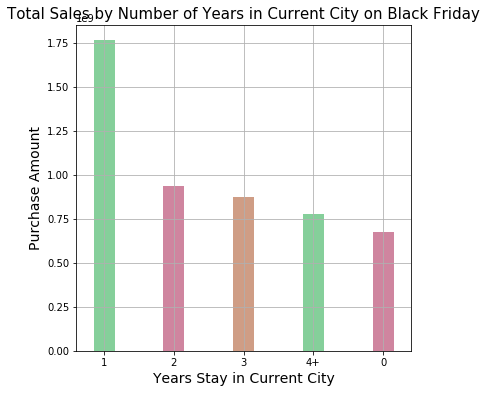

In [48]:
totalsalesbycitystay.plot(kind='bar', figsize=(6,6), width=0.3, color=[('#85cf9a', '#cf859f', '#cf9d85')], legend=False)
plt.title("Total Sales by Number of Years in Current City on Black Friday", fontsize="15")
plt.xlabel("Years Stay in Current City", fontsize="14")
plt.ylabel("Purchase Amount", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

**Average Purchase Made on Black Friday by Number of Years Stay in Current City** 

In [49]:
avgpurchaseyearstay=df.groupby('Stay_In_Current_City_Years').agg({'Purchase':np.average}).sort_values('Purchase', ascending=False)
avgpurchaseyearstay

,Purchase
Stay_In_Current_City_Years,
2,9397.607316
3,9350.685121
4+,9346.370158
1,9319.865095
0,9247.238625


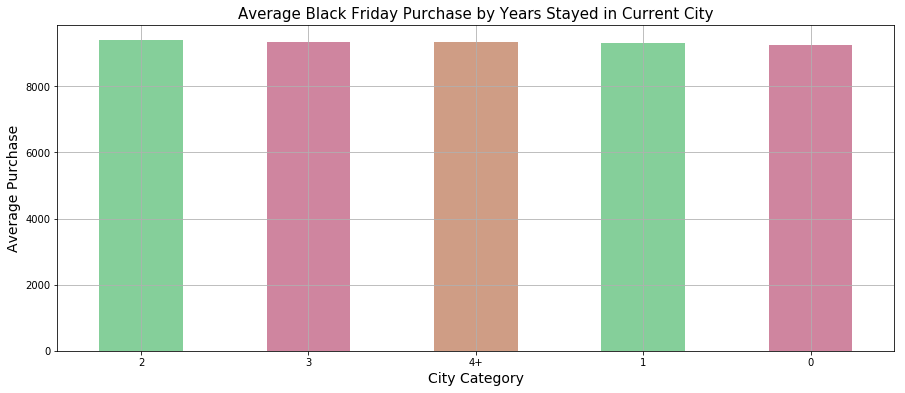

In [50]:
avgpurchaseyearstay.plot(kind='bar', figsize=(15,6), width=0.5, color=[('#85cf9a', '#cf859f','#cf9d85')], legend=False)
plt.title("Average Black Friday Purchase by Years Stayed in Current City", fontsize="15")
plt.xlabel("City Category", fontsize="14")
plt.ylabel("Average Purchase", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

<hr>

**Number of Purchases Made on Black Friday by Marital Status**

Unmarried people (marital status of 0) seem to have purchased more than married people on Black Friday.

In [51]:
marital=df['Marital_Status'].value_counts()
marital

0    317817
1    219760
Name: Marital_Status, dtype: int64

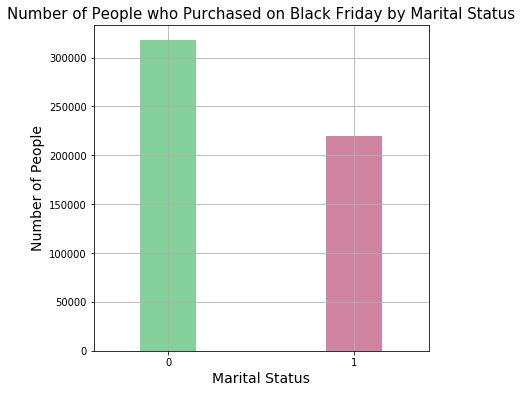

In [52]:
marital.plot(kind='bar', figsize=(6,6), width=0.3, color=[('#85cf9a', '#cf859f','#cf9d85')], legend=False)
plt.title("Number of People who Purchased on Black Friday by Marital Status", fontsize="15")
plt.xlabel("Marital Status", fontsize="14")
plt.ylabel("Number of People", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

**Total Sales Made by Marital Status**

In [53]:
totalsalesbymarital=df.groupby('Marital_Status').agg({'Purchase':np.sum}).sort_values('Purchase', ascending=False)
totalsalesbymarital

,Purchase
Marital_Status,
0,2966289500
1,2051378878


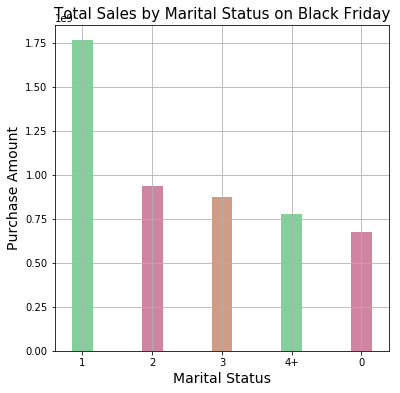

In [54]:
totalsalesbycitystay.plot(kind='bar', figsize=(6,6), width=0.3, color=[('#85cf9a', '#cf859f', '#cf9d85')], legend=False)
plt.title("Total Sales by Marital Status on Black Friday", fontsize="15")
plt.xlabel("Marital Status", fontsize="14")
plt.ylabel("Purchase Amount", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

**Average Purchase by Marital Status**

In [55]:
avgpurchasemarital=df.groupby('Marital_Status').agg({'Purchase':np.average}).sort_values('Purchase', ascending=False)
avgpurchasemarital

,Purchase
Marital_Status,
1,9334.632681
0,9333.325467


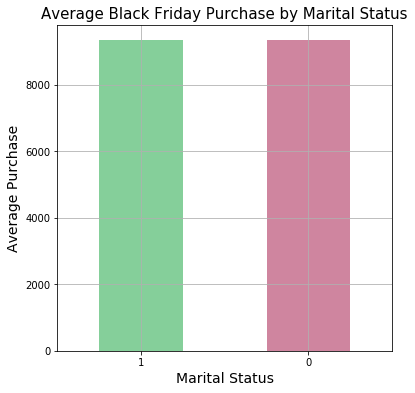

In [56]:
avgpurchasemarital.plot(kind='bar', figsize=(6,6), width=0.5, color=[('#85cf9a', '#cf859f','#cf9d85')], legend=False)
plt.title("Average Black Friday Purchase by Marital Status", fontsize="15")
plt.xlabel("Marital Status", fontsize="14")
plt.ylabel("Average Purchase", fontsize="14")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

<hr>

**Comparing Product Categories and Gender**

**Total Sales by Product Category 1 and Gender**

In [57]:
groupgenderproduct=df.groupby(['Product_Category_1','Gender']).agg({'Purchase':np.sum}).reset_index()
groupgenderproduct

,Product_Category_1,Gender,Purchase
0,1,F,331792660
1,1,M,1550873665
2,2,F,63581729
3,2,M,200915513
4,3,F,60278495
5,3,M,140133716
6,4,F,8774919
7,4,M,18163038
8,5,F,259800713
9,5,M,667116784


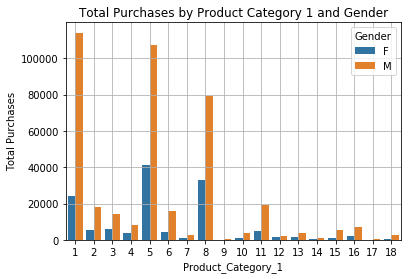

In [58]:
sns.countplot('Product_Category_1',hue='Gender',data=df)
plt.ylabel('Total Purchases')
plt.title('Total Purchases by Product Category 1 and Gender')
plt.grid()
plt.show()

**Number of Purchases by Product Category 1 and Gender**

In [59]:
groupgenderproduct1counts=pd.DataFrame(df.groupby(['Product_Category_1','Gender']).size())
groupgenderproduct1counts

0
Product_Category_1 Gender        
1                  F        24401
                   M       113952
2                  F         5573
                   M        17926
3                  F         5874
                   M        13975
4                  F         3572
                   M         7995
5                  F        41199
                   M       107393
6                  F         4475
                   M        15689
7                  F          928
                   M         2740
8                  F        32947
                   M        79185
9                  F           70
                   M          334
10                 F         1138
                   M         3894
11                 F         4659
                   M        19301
12                 F         1497
                   M         2378
13                 F         1428
                   M         4012
14                 F          613
                   M          887
15                 F         1023
                   M         5180
16                 F         2363
                   M         7334
17                 F           61
                   M          506
18                 F          376
                   M         2699

**Total Sales by Product Category 2 and Gender**

In [60]:
groupgenderproduct2=df.groupby(['Product_Category_2','Gender']).agg({'Purchase':np.sum}).reset_index()
groupgenderproduct2

,Product_Category_2,Gender,Purchase
0,2.0,F,124262637
1,2.0,M,536132973
2,3.0,F,6775031
3,3.0,M,25060694
4,4.0,F,78416389
5,4.0,M,179340708
6,5.0,F,48869160
7,5.0,M,184877970
8,6.0,F,34787552
9,6.0,M,152108469


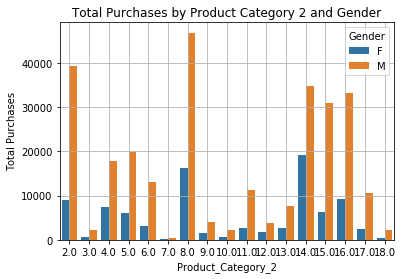

In [61]:
sns.reset_orig()
sns.countplot('Product_Category_2',hue='Gender',data=df)
plt.ylabel('Total Purchases')
plt.title('Total Purchases by Product Category 2 and Gender')
plt.grid()
plt.show()

**Number of Purchases by Product Category 2 and Gender**

In [62]:
groupgenderproduct2counts=pd.DataFrame(df.groupby(['Product_Category_2','Gender']).size())
groupgenderproduct2counts

0
Product_Category_2 Gender       
2.0                F        9039
                   M       39442
3.0                F         611
                   M        2224
4.0                F        7451
                   M       17774
5.0                F        6062
                   M       19812
6.0                F        3242
                   M       13009
7.0                F         133
                   M         482
8.0                F       16216
                   M       46842
9.0                F        1480
                   M        4111
10.0               F         718
                   M        2273
11.0               F        2708
                   M       11237
12.0               F        1706
                   M        3713
13.0               F        2619
                   M        7750
14.0               F       19309
                   M       34849
15.0               F        6328
                   M       30989
16.0               F        9318
                   M       33284
17.0               F        2441
                   M       10689
18.0               F         469
                   M        2261

**Total Sales by Product Category 3 and Gender**

In [63]:
groupgenderproduct3=df.groupby(['Product_Category_3','Gender']).agg({'Purchase':np.sum}).reset_index()
groupgenderproduct3

,Product_Category_3,Gender,Purchase
0,3.0,F,1228369
1,3.0,M,7145931
2,4.0,F,4443349
3,4.0,M,13548706
4,5.0,F,51262972
5,5.0,M,147399430
6,6.0,F,10613780
7,6.0,M,52934738
8,8.0,F,35262466
9,8.0,M,126095532


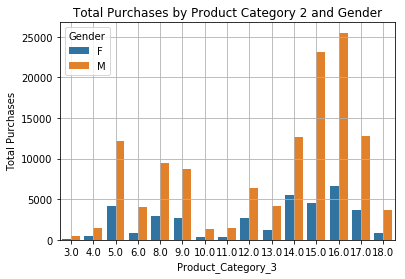

In [64]:
sns.reset_orig()
sns.countplot('Product_Category_3',hue='Gender',data=df)
#sns.set(rc={'figure.figsize':(18, 7)})
plt.ylabel('Total Purchases')
plt.title('Total Purchases by Product Category 2 and Gender')
plt.grid()
plt.show()

**Number of Purchases by Product Category 3 and Gender**

In [65]:
groupgenderproduct3counts=pd.DataFrame(df.groupby(['Product_Category_3','Gender']).size())
groupgenderproduct3counts

0
Product_Category_3 Gender       
3.0                F          94
                   M         506
4.0                F         428
                   M        1412
5.0                F        4215
                   M       12165
6.0                F         816
                   M        4002
8.0                F        2895
                   M        9489
9.0                F        2636
                   M        8778
10.0               F         411
                   M        1287
11.0               F         328
                   M        1445
12.0               F        2662
                   M        6432
13.0               F        1212
                   M        4173
14.0               F        5507
                   M       12614
15.0               F        4531
                   M       23080
16.0               F        6658
                   M       25490
17.0               F        3671
                   M       12778
18.0               F         868
                   M        3695

There are more male customers than female customers in all product categories.  However, this could also be because in the overall dataset there are more males than females.  Since there are a lot more males than females to begin with the next step might be to **normalize** the data.

<hr>

**Comparing Occupation and Gender**

**Number of Purchases by Occupation and Gender**

In [66]:
occupationgendercounts=pd.DataFrame(df.groupby(['Occupation','Gender']).size())
occupationgendercounts

0
Occupation Gender       
0          F       17658
           M       50462
1          F       17431
           M       28540
2          F        8402
           M       17443
3          F        7767
           M        9599
4          F       17340
           M       53522
5          F        2160
           M        9825
6          F        7971
           M       11851
7          F        9707
           M       48099
8          F         357
           M        1167
9          F        5707
           M         446
10         F        3912
           M        8711
11         F        1454
           M        9884
12         F        3387
           M       27036
13         F        1445
           M        6103
14         F        6621
           M       20091
15         F        2302
           M        9510
16         F        3996
           M       20794
17         F        3742
           M       35348
18         F         216
           M        6309
19         F        1974
           M        6378
20         F        8648
           M       24262

**Total Sales by Occupation and Gender**

In [67]:
occupationgender=df.groupby(['Occupation','Gender']).agg({'Purchase':np.sum}).reset_index()
occupationgender

,Occupation,Gender,Purchase
0,0,F,157280334
1,0,M,468534477
2,1,F,149248540
3,1,M,265304289
4,2,F,71231716
5,2,M,162043677
6,3,F,70901242
7,3,M,89527208
8,4,F,149423449
9,4,M,508106944


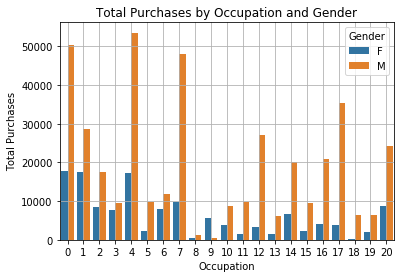

In [68]:
sns.reset_orig()
sns.countplot('Occupation',hue='Gender',data=df)
#sns.set(rc={'figure.figsize':(18, 7)})
plt.ylabel('Total Purchases')
plt.title('Total Purchases by Occupation and Gender')
plt.grid()
plt.show()

<hr>

to be continued..